In [1]:
cd C:\rr_project\cyclone_classification

C:\rr_project\cyclone_classification


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

df = pd.read_csv('pacific.csv')
# Convert date column as datetime.
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')


def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Longitude Latitude_Hemisphere.    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

# numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

# The missing values are given by -999. 
# fill them with mean.
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(df[column][df[column] != -999 ].mean())
#         print("mean",mean)
        index = df.loc[df[column] == -999 , column].index
#         print("index" , index )
        df.loc[df[column] == -999 , column] = mean
#         print(df.loc[index , column])
        
# remove columns ID and Event.        
df =  df[['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Latitude_Hemisphere' , 
       'Longitude', 'Longitude_Hemisphere' ,'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t

df['Time'] = df['Time'].apply(hhmm)


df['Time'] = pd.to_datetime(df['Time'] , format='%H%M').dt.time


# status column to categorical.
df['Status'] = df['Status'].astype('category')

data = df.drop(columns = ['ID' , 'Event'])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisp

In [5]:
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,1949-06-12,06:00:00,TS,20.5,0,109.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,1949-06-12,12:00:00,TS,20.6,0,110.2,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,1949-06-17,12:00:00,TS,14.1,0,107.0,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,1949-06-17,18:00:00,TS,14.6,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,1949-06-18,00:00:00,TS,15.0,0,108.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5


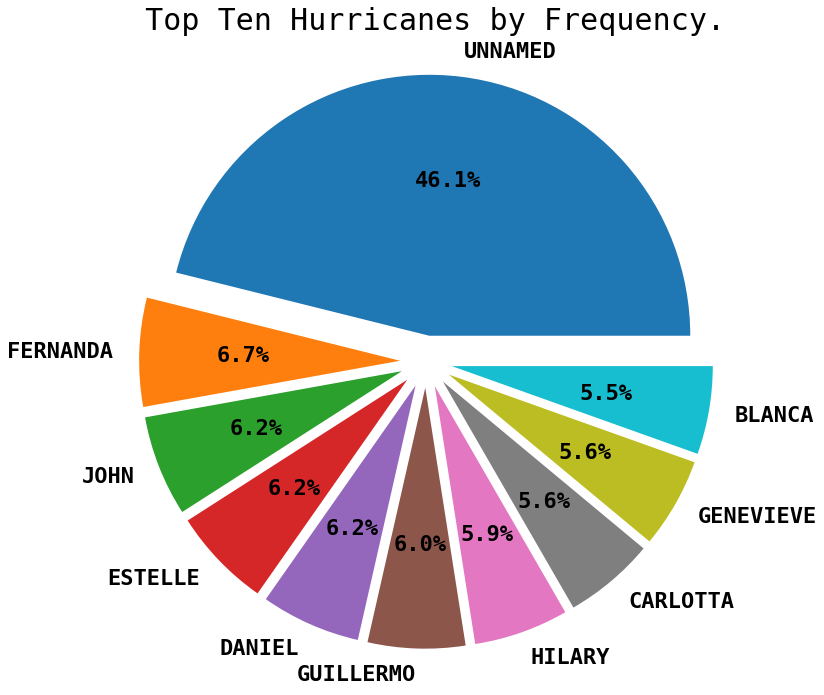

In [6]:
lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Top Ten Hurricanes by Frequency.' , fontsize = 30, )
plt.show()

Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

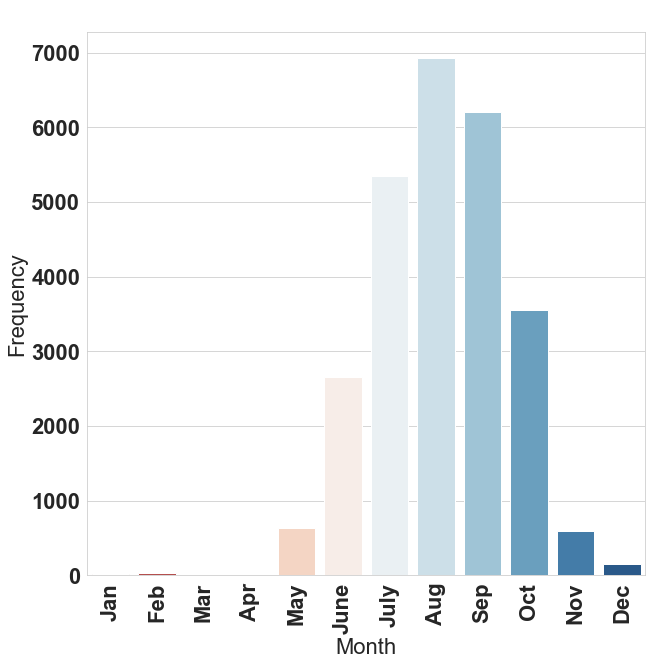

In [7]:
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = data.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.', color = 'white')

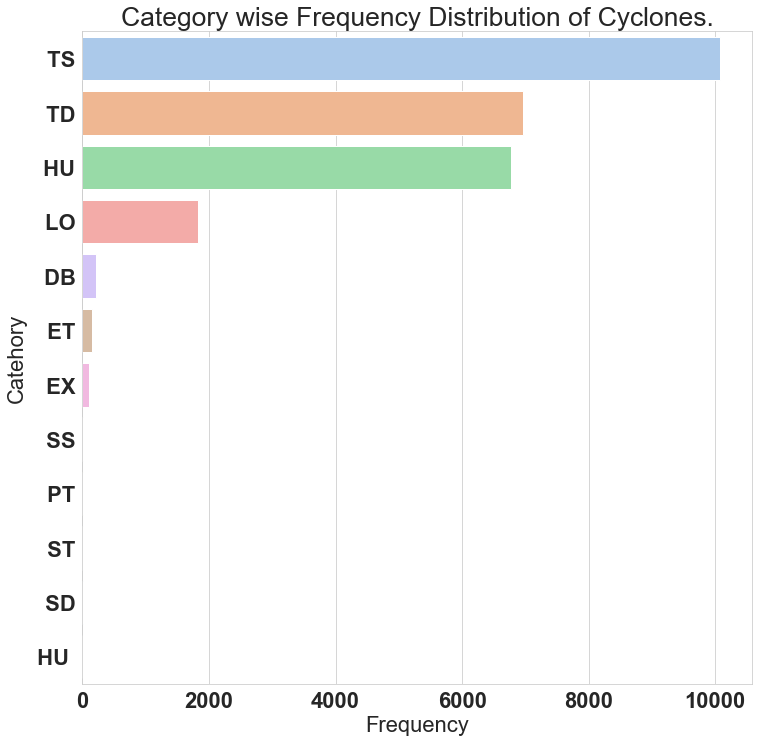

In [8]:
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 

# model.
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')


# target and training variables.
x_train = data[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW' , 'Month' , 'Year']]
y_train = data['Status']


from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))

dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9651068271145011
Recall score for Decision Tree is : 0.9651068271145011
Precision score for Decision Tree is : 0.9639969870825983


In [10]:
from sklearn.ensemble import RandomForestClassifier

#important features.
rf = RandomForestClassifier(oob_score=True , n_estimators=1000)
rf.fit(x_train , y_train)
features = pd.Series(rf.feature_importances_ , index= x_train.columns).sort_values(ascending=False)
features

Maximum Wind            0.640439
Minimum Pressure        0.108582
Latitude                0.038301
Year                    0.037778
Longitude               0.036267
Low Wind NE             0.024295
Low Wind NW             0.017955
Low Wind SE             0.016425
High Wind NE            0.013416
Month                   0.011452
Low Wind SW             0.011402
High Wind SE            0.010433
High Wind NW            0.008417
High Wind SW            0.005212
Moderate Wind SE        0.005009
Moderate Wind NE        0.004687
Moderate Wind SW        0.004077
Moderate Wind NW        0.003679
Longitude_Hemisphere    0.002173
Latitude_Hemisphere     0.000000
dtype: float64

In [11]:
features.index[:5]


Index(['Maximum Wind', 'Minimum Pressure', 'Latitude', 'Year', 'Longitude'], dtype='object')

In [12]:
x_trainf = data[features.index[:5]]
y_train = data['Status']

from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_trainf):
    xtr = x_trainf.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_trainf.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))

dt_scr5 = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9651068271145011
Recall score for Decision Tree is : 0.9651068271145011
Precision score for Decision Tree is : 0.9639969870825983
